In [29]:
pwd

'/MS3D/tools'

In [30]:
import visualize_bev

In [31]:
ls

__pycache__/     eval_utils/             test.py        visualize_3d.py
_init_path.py    generate_tracks.py      train.py       visualize_bev.py
cfgs/            process_tools/          train_utils/
demo/            temp.txt                vis_.ipynb
ensemble_kbf.py  temporal_refinement.py  visual_utils/


In [50]:
!python visualize_bev.py --cfg_file cfgs/dataset_configs/kitti_raw_dataset_da.yaml \
                            --ps_pkl cfgs/target_kitti/label_generation/round1/ps_labels/initial_pseudo_labels.pkl \
                            --idx 25 


cfg_file cfgs/dataset_configs/kitti_raw_dataset_da.yaml
config {'ROOT_DIR': PosixPath('/MS3D'), 'LOCAL_RANK': 0}
config /MS3D/tools
2024-01-14 21:53:44,698   INFO  Loading KITTI dataset
INFO_PATH_ mode ['kitti_infos_train.pkl']
2024-01-14 21:53:44,900   INFO  Total samples for KITTI dataset: 200
saved!! ../data_temp/autolabel_kitti/pseudo_label_images/round1/figure_000025.png
Figure(2000x2000)


In [10]:
# Basic setup
import sys
sys.path.append('/MS3D')
# sys.path.append('/home/ubuntu/BegumGorkem/MS3D/pcdet/utils/')
import numpy as np
import copy
import torch
import pickle
from demo_utils import visualize_bev
from demo_utils import load_dataset_and_model, load_yaml
from demo_utils import generate_predictions, format_ensemble_preds
from demo_dataset import DemoDataset
from pcdet.utils import box_fusion_utils, ms3d_utils, tracker_utils, common_utils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [11]:
cd ..

/MS3D/tools


In [12]:
pwd

'/MS3D/tools'

In [3]:
import pickle

with open('cfgs/target_kitti/label_generation/round1/ps_labels/initial_pseudo_labels.pkl','rb') as f:
    detection_sets = pickle.load(f)

In [4]:
detection_sets["0"].keys()

dict_keys(['gt_boxes'])

In [5]:
detection_sets["0"]["gt_boxes"].shape

(13, 9)

In [6]:
print(f'Num frames: {len(detection_sets)}')
# print(f'Num detection sets: {len(np.unique(detection_sets[0]["source_id"]))}')
# print(f'Keys: {list(detection_sets[0].keys())}')
# print(f'total num boxes for frame #0: {detection_sets[0]["boxes_lidar"].shape}')

Num frames: 100


In [13]:
target_domain_cfg = load_yaml("cfgs/dataset_configs/custom_dataset_da.yaml")
data_dir = "/MS3D/data/custom_data/kitti/sequences/sequence_10"

<IPython.core.display.Javascript object>


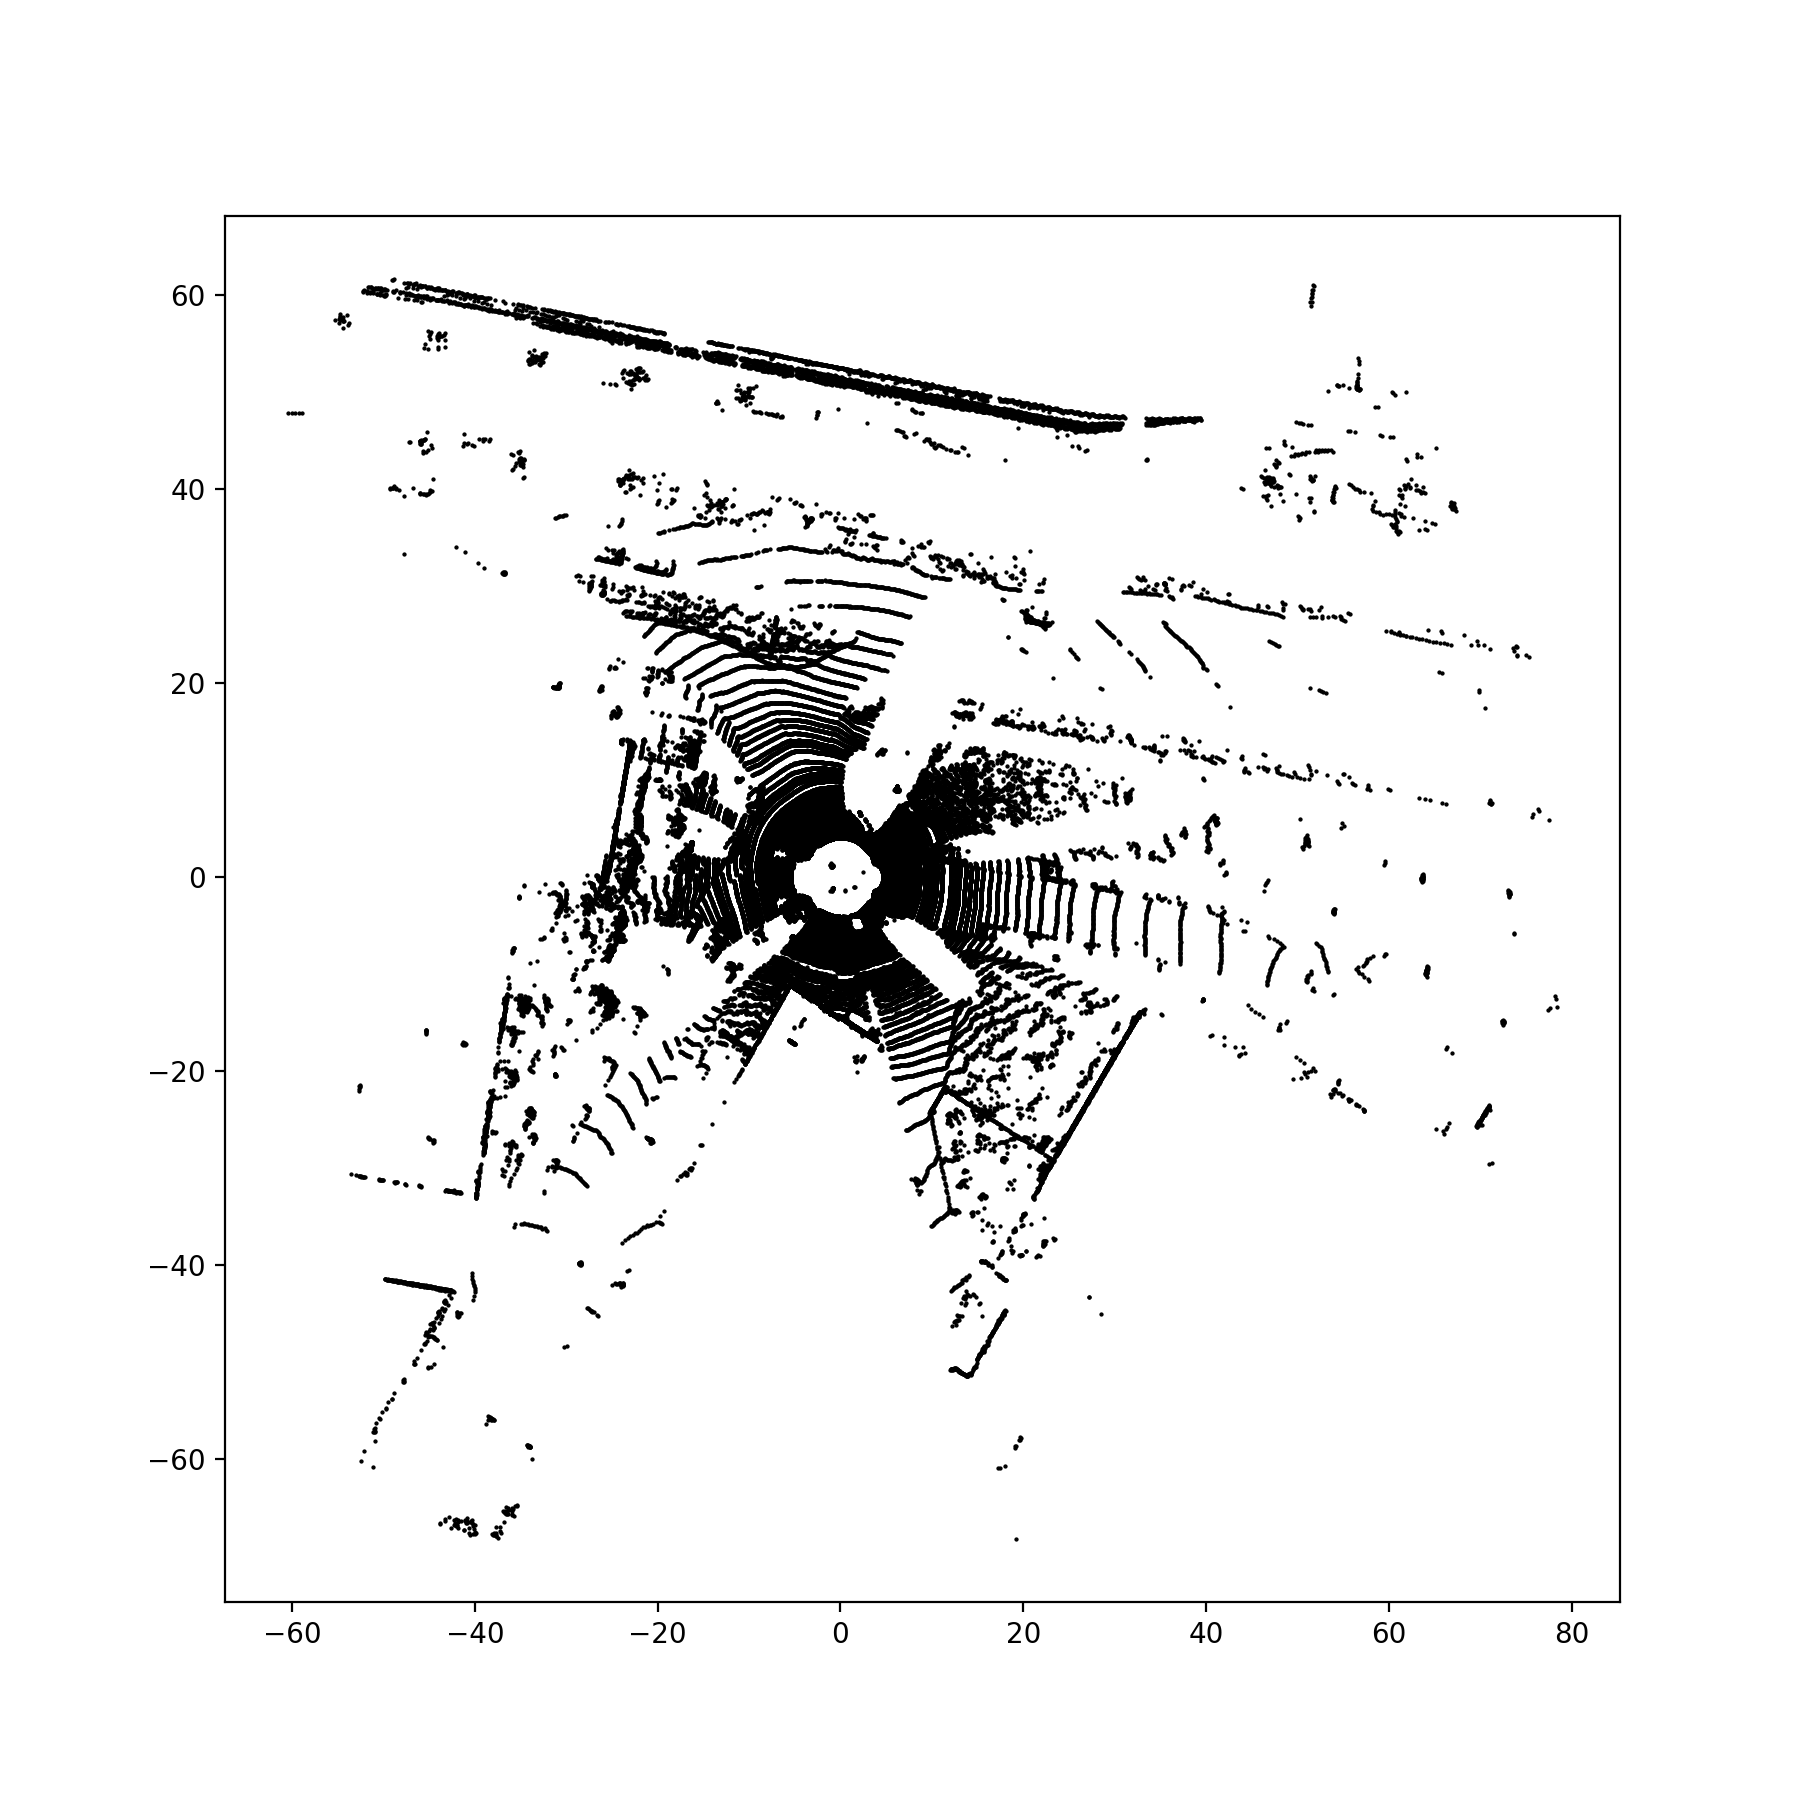

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [14]:
%matplotlib notebook

dataset = DemoDataset(
        dataset_cfg=target_domain_cfg, class_names=target_domain_cfg.CLASS_NAMES, training=False,
        root_path=data_dir, ext='.pcd', logger=common_utils.create_logger(), sweeps=1
    )

# This is interactive. Use the buttons below to zoom in/zoom out/move around.
fig, ax = visualize_bev(dataset, idx=0, detection_sets=detection_sets["10"]["gt_boxes"], show_legend=True)